# 4.1 선형회귀

모델을 훈련시킨다는 것은 모델이 훈련 세트에 맞도록 모델 파라미터를 설정하는 것

성능 측정 지표로 RMSE를 많이 사용함  
RMSE를 최소화하는 $\theta$를 찾아야 함

## 4.1.1 정규방정식

비용 함수를 최소화하는 $\theta$를 찾기 위한 해석적인 방법  
$\hat\theta=(X^TX)^{-1}X^Ty$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)

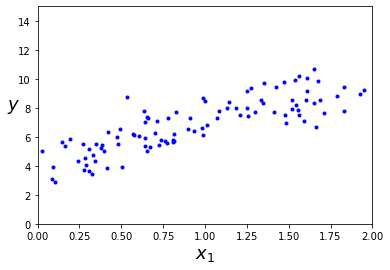

In [2]:
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [3]:
x_b=np.c_[np.ones((100,1)),x]
theta_best=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [4]:
theta_best

array([[4.17241073],
       [2.86187839]])

$\hat{y}=X\hat\theta$

In [5]:
x_new=np.array([[0],[2]])
x_new_b=np.c_[np.ones((2,1)),x_new]
y_predict=x_new_b.dot(theta_best)
y_predict

array([[4.17241073],
       [9.8961675 ]])

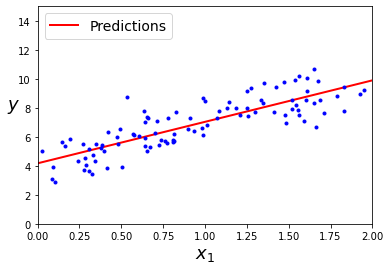

In [6]:
plt.plot(x_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.17241073]), array([[2.86187839]]))

In [8]:
lin_reg.predict(x_new)

array([[4.17241073],
       [9.8961675 ]])

LinearRegression 클래스는 `scipy.linalg.lstsq()` 함수("least squares"의 약자)를 사용하므로 이 함수를 직접 사용할 수 있음

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)
theta_best_svd

array([[4.17241073],
       [2.86187839]])

이 함수는 $X^+y$을 계산  
$X^+$는 $X$의 유사역행렬 (pseudoinverse)(Moore–Penrose 유사역행렬)  
`np.linalg.pinv()`을 사용해서 유사역행렬을 직접 계산

$\hat\theta=X^{-1}\hat{y}$

In [10]:
np.linalg.pinv(x_b).dot(y)

array([[4.17241073],
       [2.86187839]])

유사역행렬은 특이값 분해(SVD)라 부르는 표준 행렬 분해 기법을 사용해  $X^+=V\sum^+ U^T$계산  
SVD는 훈련 세트 행렬 $X$를 3개의 행렬곱셈 $U \sum V^T$로 분해 

## 4.1.2 계산 복잡도

정규 방정식은 $(n+1)\times(n+1)$ 크기가 되는 $X^TX$의 역행렬을 계산

# 4.2 경사 하강법

여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘  
경사 하강법의 기본 아이디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것   


$\theta$를 임의 값으로 시작해서 한 번에 조금씩 비용 함수가 감소되는 방향으로 진향하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상

경사 하강법에서 중요한 파라미터는 step의 크기로, 학습률 파라미터로 결정  
학습률이 너무 작으면 알고리즘이 수렴하기 의해 많이 반복해야 하므로 시간이 오래 걸림

선형 회귀를 위한 mse 비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가르지 않는 볼록함수  
지역 최솟값은 없고 전역 최솟값만 존재

## 4.2.1 배치 경사 하강법

각 모델 파라미터 $\theta_{j}$에 데해 비용함수의 그래디언트를 계산

$$\frac{\partial}{\partial\theta} MSE(\theta)=\frac{2}{m}X^T(X\theta-y)$$

경사 하강법의 스텝:  
$$\theta^{(nextstep)}=\theta-\eta\frac{\partial}{\partial\theta} MSE(\theta)$$

In [11]:
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # 랜덤 초기화

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients

In [12]:
theta

array([[4.17241073],
       [2.86187839]])

In [13]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(x_b)
    plt.plot(x, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = x_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(x_new, y_predict, style)
        gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

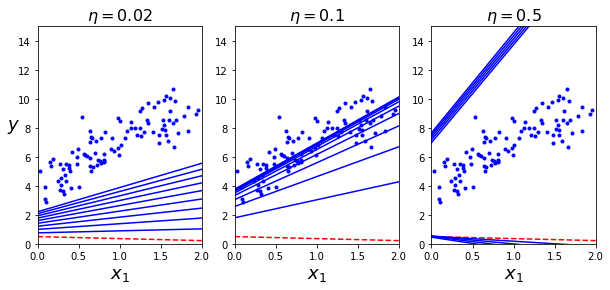

In [14]:
np.random.seed(42)
theta = np.random.randn(2,1) 

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

적절한 학습률을 찾으려면 그리드 탐색을 사용하는데 너무 오래 걸리는 것을 막기 위해 횟수 제한  
반복 횟수를 크게 해놓고 벡터의 놈이 $\epsilon$보다 작으면 알고리즘 중지

## 4.2.2 확률적 경사 하강법

배치 경사 하강법은 매 스텝에서 전체 훈련 세트를 사용햐 그래디언트를 계산 $\rightarrow$ 데이터가 커지면 느려짐  
확률적 경사 하강법은 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그래디언트를 계산

m번 반복하는데 이때 각 반복을 에포크라고 함

In [15]:
theta_path_sgd = []
m = len(x_b)
np.random.seed(42)

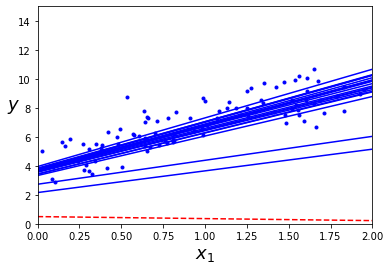

In [16]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = x_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(x_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(x, y, "b.")                                
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)         
plt.axis([0, 2, 0, 15])                                                       
plt.show()        

In [17]:
theta

array([[4.17414945],
       [2.88305114]])

In [18]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(x, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [19]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.13153192]), array([2.8565955]))

## 4.2.3 미니배치 경사 하강법

미니배치라고 부르는 임의의 작은 샘플 세트에 대해 그래디언트를 계산  

In [20]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    x_b_shuffled = x_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = x_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [21]:
theta

array([[4.11603179],
       [2.81976902]])

In [22]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

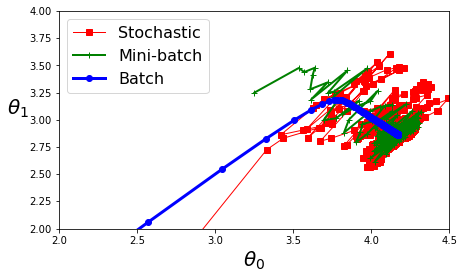

In [23]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2, 4.5, 2, 4])
plt.show()

- 훈련과정동안 파라미터 공간에서 움직인 경로  
최솟값으로 도달했지만 배치 경사 하강법의 경로는 멈추었는데 SGD나 미니배치 경사 하강법은 근처에서 맴돈다

# 4.3 다항 회귀

비선형 데이터를 학습하는 데 선형 모델을 사용할 수 있음  
각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시는 것

- 2차방정식으로 비선형 데이터를 생성  
PolynomialFeatures를 사용해 훈련 데이터를 변환 

In [24]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [25]:
m=100
x=6*np.random.rand(m,1)-3
y=0.5*x**2+x+2+np.random.rand(m,1)

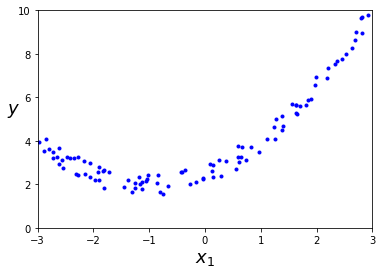

In [26]:
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly=PolynomialFeatures(degree=2,include_bias=False)
x_poly=poly.fit_transform(x)

In [29]:
x[0]

array([-0.75275929])

In [30]:
x_poly[0]

array([-0.75275929,  0.56664654])

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.49786712]), array([[0.9943591 , 0.49967213]]))

$$y=0.5x_{1}^2+1.0x_{1}+2+\epsilon$$  
$\rightarrow$     
$$\hat{y}=0.5x_{1}^2+0.99x_{1}+2.5$$

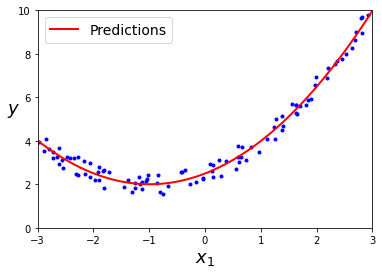

In [36]:
x_new=np.linspace(-3, 3, 100).reshape(100, 1)
x_new_poly = poly.transform(x_new)
y_new = lin_reg.predict(x_new_poly)
plt.plot(x, y, "b.")
plt.plot(x_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

`PolynomialFeatures`가 주어진 차수까지 특성 간의 모든 교차항을 추가함  
예를 들어 특성이 a,b가 있을 때 degree=3이면 $a^2,a^3,b^2,b^3$뿐만 아니라 $ab,ab^2,a^2b$도 추가

# 4.4 학습 곡선

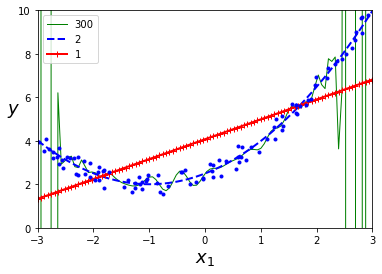

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(x_new)
    plt.plot(x_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(x, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()